In [1]:
from langgraph.graph import StateGraph, START, END 
from typing import TypedDict

In [11]:
# define state

class HeroState(TypedDict):
    strength: float
    speed: float
    stamina: float

    total_battles: int
    episodes: int

    positive_interactions: int
    negative_interactions: int

    power_level: float
    battles_per_episode: float
    respect_earned: float
    
    summary: str

In [19]:
# define functions

def power_level(state: HeroState) -> HeroState:

    power_level = 0.4 * state["strength"] + 0.35 * state["speed"] + 0.25 * state["stamina"]
    
    return {"power_level": power_level}


def battles_per_episode(state: HeroState) -> HeroState:

    bpe = state["total_battles"] / state["episodes"]
    
    return {"battles_per_episode": bpe}


def respect_earned(state: HeroState) -> HeroState:

    respect = state["positive_interactions"] - state["negative_interactions"]
    
    return {"respect_earned": respect}


def summary(state: HeroState) -> HeroState:

    summary = (
        f"Our hero boasts a formidable power level of {state['power_level']:.2f}. "
        f"On average, they face {state['battles_per_episode']:.2f} intense battles each episode, "
        f"earning a well-deserved respect score of {state['respect_earned']} from allies and rivals alike."
    )
    
    return {"summary": summary}

In [20]:
# define graph

graph = StateGraph(HeroState)

# add notes
graph.add_node("power_level", power_level)
graph.add_node("battles_per_episode", battles_per_episode)
graph.add_node("respect_earned", respect_earned)
graph.add_node("summary", summary)

# add edges
graph.add_edge(START, "power_level")
graph.add_edge(START, "battles_per_episode")
graph.add_edge(START, "respect_earned")

graph.add_edge("power_level", "summary")
graph.add_edge("battles_per_episode", "summary")
graph.add_edge("respect_earned", "summary")

graph.add_edge("summary", END)


# compile graph
workflow = graph.compile()

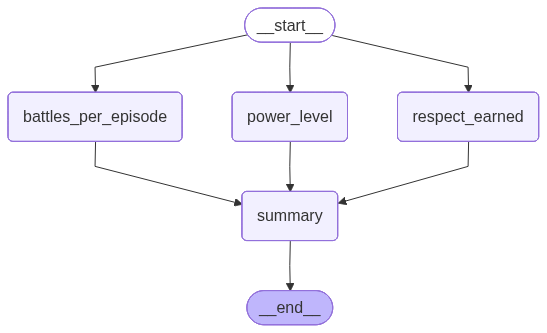

In [21]:
workflow

In [22]:
# execute graph
initial_state = {
    "strength": 85,
    "speed": 75,
    "stamina": 90,
    "total_battles": 150,
    "episodes": 30,
    "positive_interactions": 45,
    "negative_interactions": 10
}

final_state = workflow.invoke(initial_state)

In [23]:
print(final_state["summary"])

Our hero boasts a formidable power level of 82.75. On average, they face 5.00 intense battles each episode, earning a well-deserved respect score of 35 from allies and rivals alike.
